# Homework 03
- read up on abstract data types (list, queue, stack, deque) on wikipedia
- python tutorial chapter 5

Please fill in: Alan Hahn

## Introduction

In [31]:
# Using a Python list (array) and adding/removing elements 
s=[2,3,4]
s.append(5)
s.insert(0,1)
print (s)
print ("s before:",s)
print ("pop(): ", s.pop())
print ("s after:", s)
print ("pop(): ", s.pop())
print ("s after:", s)
print ("pop(0): ", s.pop(0))
print ("s finally:", s)

[1, 2, 3, 4, 5]
s before: [1, 2, 3, 4, 5]
pop():  5
s after: [1, 2, 3, 4]
pop():  4
s after: [1, 2, 3]
pop(0):  1
s finally: [2, 3]


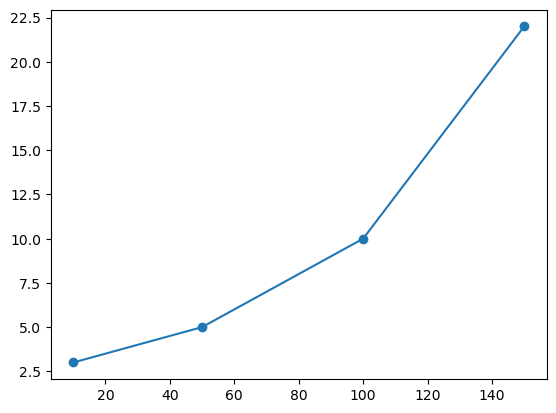

In [32]:
# plotting works very similar to MATLAB
%matplotlib inline
import matplotlib.pyplot as plt
x = [10, 50, 100, 150]
y = [3, 5, 10, 22]

plt.plot(x, y, 'o-')
plt.show()

In [33]:
# Implement a Stack:
class MyStack:
    """ simple stack implemented using a Python list (array)"""
    def __init__(self):
        self.data = []
        
    def push(self,x):
        self.data.append(x)
        
    def pop(self):
        return self.data.pop()
    
    def is_empty(self):
        return len(self.data) == 0
    
s = MyStack()
s.push(3)
s.push(4)
s.push(5)
print (s.pop(), s.pop(), s.pop())
print (s.is_empty())

5 4 3
True


In [36]:
def stack_fill_and_empty(n):
    S = MyStack()
    for item in range(n):
        S.push(item)
        
    while n>0:
        S.pop()
        n -= 1

sizes = [10000, 20000, 40000, 80000, 160000, 320000]
for n in sizes:
    %timeit stack_fill_and_empty(n)

3.84 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.59 ms ± 40 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.4 ms ± 437 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.3 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
64 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
131 ms ± 5.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
import numpy as np
def fit_poly(x,y,k):
    n = len(x)
    x = np.array(x)
    y = np.array(y)
    A = np.zeros((n,k+1))
    for i in range(k+1):
        A[:,i] = np.array(x)**i
        
    c = np.linalg.lstsq(A,y)[0]
    misfit = np.linalg.norm(np.dot(A,c)-y)    
    return c, misfit

In [38]:
x = sizes
y = [4.01, 8.66, 17.6, 35.5, 66.6, 131]    # Replace with times from timeit runs
c, misfit = fit_poly(x, y, 3) # find a good coefficient!
print ("coefficients:",c)
print ("misfit:", misfit)

coefficients: [ 1.67431614e-08  4.62187594e-04 -3.93178696e-10  7.12375037e-16]
misfit: 1.0521325007490785


/var/folders/1d/qyh74b9d0jv5bsb_gg5785400000gn/T/ipykernel_52346/41701495.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(A,y)[0]


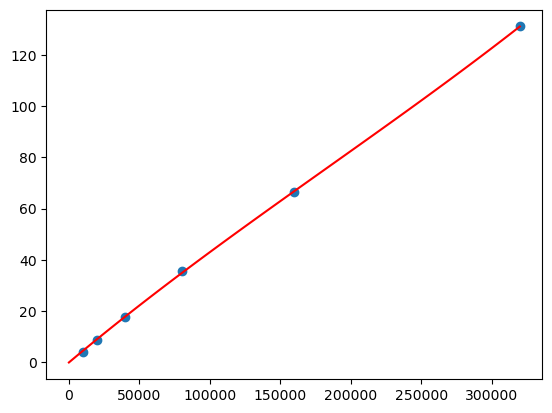

In [39]:
xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

In [40]:
# alternatively fitting f(x)=c0 x^c1:
c, misfit = fit_poly(np.log(x),np.log(y),1)
print ("best fitting polynomial:",np.exp(c[0]),"x^",c[1])

best fitting polynomial: 0.0004248411774493428 x^ 0.9997313474781925


/var/folders/1d/qyh74b9d0jv5bsb_gg5785400000gn/T/ipykernel_52346/41701495.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(A,y)[0]


We can conclude that pushing n elements to the stack and removing them again takes O(n) time. This means each operation is O(1) (on average!) 

## 1. Test queue operations using a Python list
We first use a Python list (array) as an (inefficient) queue. Our test consists of queueing n elements and then dequeueing all of them. Complete the code below, time for different n, create a fit of the right degree and conclude what the cost of queueing and dequeueing one element is. (We just want the naive implementation here, not the circular queue discussed in class. Just use appropriate append() and pop() calls.)

In [41]:
def fill_and_empty_queue_using_list(n):
    L = []
    for item in range(n):
        L.append(item)
        # queue item in L (add to end):
        
    while n>0:
        L.pop(0)
        #L.pop
        # dequeue item in L (remove from start):
        n -= 1

sizes = [10000,20000,40000,80000,160000]
for n in sizes:
    %timeit fill_and_empty_queue_using_list(n)

16 ms ± 79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
64.3 ms ± 80.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
279 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.28 s ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.32 s ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/var/folders/1d/qyh74b9d0jv5bsb_gg5785400000gn/T/ipykernel_52346/41701495.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(A,y)[0]


coefficients: [-1.72392157e-02  6.96907021e-07  2.12409235e-10]
misfit: 0.024602914006456762


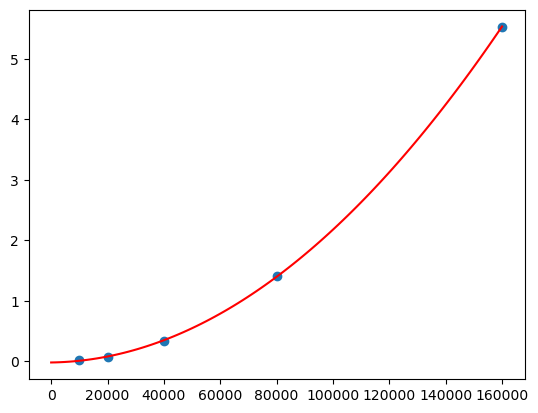

In [42]:
x = sizes
y = [.0232, .0758, .334, 1.41, 5.53] # fill with timieit results
c, misfit = fit_poly(x,y,2)
print ("coefficients:",c )
print ("misfit:", misfit)

xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

In [43]:
c, misfit = fit_poly(np.log(x),np.log(y),1)
print ("best fitting polynomial:",np.exp(c[0]),"x^",c[1])

best fitting polynomial: 2.1028807564680433e-10 x^ 2.0011375233766127


/var/folders/1d/qyh74b9d0jv5bsb_gg5785400000gn/T/ipykernel_52346/41701495.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(A,y)[0]


fill_and_empty_queue_using_list(n) takes O(n^2). To conclude:
1. enqueue one element (append to a list) takes O(1)
2. dequeuing one element (remove from the left) takes O(n)
3. while removing the last element takes O(n).

## 2. Using a deque
A _deque_ (pronounced "deck") or _double-ended queue_ permits both pushes and pops at both the left and right ends of the list.

First determine the correct functions to call to enqueue (add to the right) and dequeue (pop from the left) an element from a deque. Try it out in the next block (it should print 1, then 2, then 3).
Then complete dequeue_fill_and_empty() with those commands, benchmark it, fit a curve, and conclude.

In [44]:
from collections import deque
Q = deque()
Q.append(1) # enqueue 1
Q.append(2) # enqueue 2
Q.append(3) # enqueue 3
print (Q.popleft()) # dequeue and print
print (Q.popleft()) # dequeue and print
print (Q.popleft()) # dequeue and print

1
2
3


In [45]:
def dequeue_fill_and_empty(n):
    L = deque()
    for item in range(n):
        L.append(item) # enqueue
        
    while n>0:
        L.popleft() # now dequeue
        n -= 1

sizes = [10000,20000,40000,80000,160000]
for n in sizes:
    %timeit dequeue_fill_and_empty(n)

1.64 ms ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.4 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.53 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.3 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


coefficients: [-6.53408683e-04  6.39396069e-07 -8.16239468e-13  3.81927156e-18]
misfit: 0.0003055411902347575


/var/folders/1d/qyh74b9d0jv5bsb_gg5785400000gn/T/ipykernel_52346/41701495.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(A,y)[0]


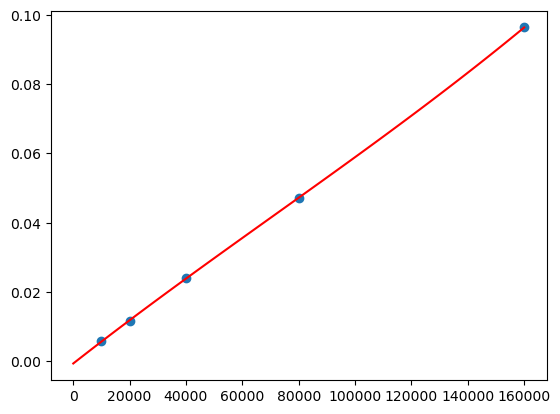

In [46]:
x = sizes
y = [.00579,.0116,.024,.0472,.0964] # fill
c, misfit = fit_poly(x,y,3)
print ("coefficients:",c)
print ("misfit:", misfit)

xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

Filling and emptying a queue (n elements) based on Python's deque takes: O(n). Therefore, a single enqueue() or dequeue() takes: O(1). Read up on wikipedia on "deque" an state the cost for the operations for:
1. add element on left: O(1)
2. add element on right: O(1)
3. remove element on left: O(1)
4. remove element on right: O(1)

Is that what you see? Yes

## Question 3: Now implement a deque using a doubly-linked list
Complete the implementation, make sure the tests work, and finally time the operations.

In [47]:
class MyDeque:
    """ a double-ended queue implemented using a linked list"""
 
    class ListItem:
        """ an item in a doubly-linked list"""
        def __init__(self, x, prev, next):
            self.item = x
            self.prev = prev
            self.next = next

    def __init__(self):
        self.head = None
        self.tail = None
        
    def push_right(self, x):
        if self.head == None:
            self.head = MyDeque.ListItem(x,None, None)
            self.tail = self.head
        else:
            n = MyDeque.ListItem(x, self.tail, None)
            self.tail.next = n
            self.tail = n
            
    def push_left(self, x):
        if self.head == None:
            self.head = MyDeque.ListItem(x,None, None)
            self.tail = self.head
        else:
            n = MyDeque.ListItem(x, None, self.head)
            self.head.prev = n
            self.head = n
   
    def pop_left(self):
        if self.head == None:
            return None
        item = self.head.item
        if self.head.next == None:
            self.head = None
            self.tail = None
        else:
            newhead = self.head.next
            newhead.prev = None
            self.head = newhead
        return item
    
    def pop_right(self):
        if self.head == None:
            return None
        item = self.tail.item
        if self.head.next == None:
            self.head = None
            self.tail = None
        else:
            newtail = self.tail.prev
            newtail.next = None
            self.tail = newtail
        return item
    
    def print_it(self):
        it = self.head
        print("[[")#, end="")
        while it != None:
            print(it.item)#, end=" ")
            it = it.next
        print ("]]")

Q = MyDeque()
Q.push_right(1)
Q.push_right(2)
Q.push_right(3)
Q.push_left(0)
Q.push_right(4)
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())
Q.print_it()
print ("pop_left:", Q.pop_left())
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())

[[
0
1
2
3
4
]]
pop_left: 0
pop_right: 4
[[
1
2
3
]]
pop_left: 1
[[
2
3
]]
pop_left: 2
pop_right: 3
[[
]]
pop_left: None
pop_right: None


In [29]:
# some more tests:

Q = MyDeque()
Q.push_left(1)
Q.push_right(2)
assert(Q.head.item == 1)
assert(Q.tail.item == 2)
assert(Q.head.next == Q.tail)
assert(Q.head.prev == None)
assert(Q.tail.prev == Q.head)
assert(Q.pop_right()==2)
assert(Q.head.item == 1)
assert(Q.head == Q.tail)
assert(Q.head.prev == None)
assert(Q.head.next == None)
assert(Q.pop_right()==1)
assert(Q.head == None)
assert(Q.tail == None)

for n in range(5):
    Q.push_right(n)
Q.print_it()    
for n in range(5):
    assert(Q.pop_left()==n)
assert(Q.pop_left()==None) 

for n in range(5):
    Q.push_left(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_right()==n)
assert(Q.pop_right()==None)

for n in range(5):
    Q.push_right(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_right()==4-n)
    
for n in range(5):
    Q.push_left(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_left()==4-n)

print ("ok")

[[
0
1
2
3
4
]]
[[
4
3
2
1
0
]]
[[
0
1
2
3
4
]]
[[
4
3
2
1
0
]]
ok


In [48]:
def test_our_deque(n):
    Q = MyDeque()
    for idx in range(n):
        Q.push_right(n)
        Q.push_left(n)
        
    for idx in range(n):
        Q.pop_left()
        Q.pop_right()

sizes = [10000, 20000, 40000, 80000, 160000]
for n in sizes:
    %timeit test_our_deque(n)

22.5 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
53.4 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
96.3 ms ± 6.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
199 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
419 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


test_our_deque() takes: O(n). Therefore, all operations take O(1) as expected!